## Лабораторная работа 1 - Знакомство с векторными и матричными операциями на примере библиотеки [NumPy](https://numpy.org/doc/stable/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

В машинном обучении часто используется логистистическая функция:
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

Визуализировать эту функцию на промежутке $[-5, 5]$

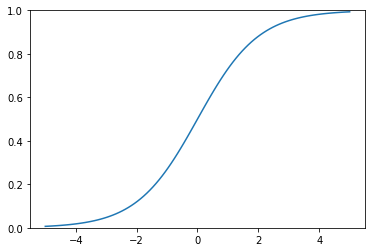

In [103]:
x = np.linspace(-5, 5, 100)
y = np.divide(1, np.sum([1, np.exp(-x)]))

plt.plot(x, y)
plt.ylim(0, 1)
plt.show()

### Задание 2

1. [Создайте](https://numpy.org/doc/stable/reference/generated/numpy.array.html) вектор $v=\overline{(0,1)}$;
2. Создайте матрицу 
$M=\begin{bmatrix}
\cos \alpha  & -\sin \alpha \\
\sin \alpha  & \cos \alpha 
\end{bmatrix}$ , где $\alpha \in R$;
3. Вычислите $v_i, i \in \{1..100\}$, где
$v_1=v,
v_{n+1}=v_n\times M \cdot 0.99$;

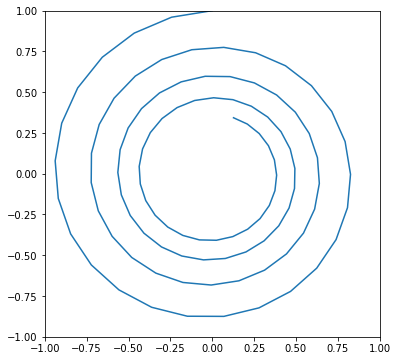

In [392]:
import numpy as np
import matplotlib.pyplot as plt

alfa = np.random.randint(0, 100)

v = [0, 1]
M = [[np.cos(alfa), -np.sin(alfa)], [np.sin(alfa), np.cos(alfa)]]
vs = [v]
for i in range(100):
    vs.append(np.dot(vs[i], M).dot(0.99))

vs = np.array(vs)
    
plt.figure(figsize=(6, 6))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot(*vs.T)
plt.show()

### Задание 3

Одним из алгоритмов обучения с учителем является так называемая полиномиальная регрессия. Для этого метода, нужно имея матрицу
$$X=\begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots \\
x_{m}
\end{bmatrix}$$
получить матрицу степеней:
$$X_p=\begin{bmatrix}
x^{0}_{1} & x^{1}_{1} & \dotsc  & x^{p}_{1}\\
x^{0}_{2} & x^{1}_{2} & \dotsc  & x^{p}_{2}\\
\vdots  & \vdots  &  & \vdots \\
x^{0}_{m} & x^{1}_{m} & \dotsc  & x^{p}_{m}
\end{bmatrix}$$

Имея матрицу $X$, заданную ниже, вычислите матрицу $X_p$, для $p=5$.
Решить задачу как с использованием цикла по степеням, так и без него.

Полезные функции: [stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html), [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).

Shape of X: (1000, 1)
Shape of X_p (1000, 6)


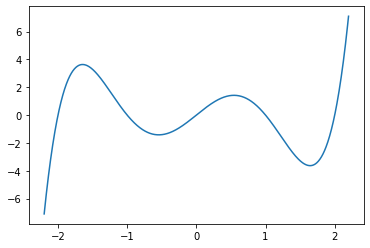

In [393]:
X = np.linspace(-2.2, 2.2, 1000)[:, np.newaxis]
print(f'Shape of X: {X.shape}')

X_p = np.concatenate([X ** i for i in range(6)], axis=-1)
# X_p = X ** np.arange(6)
print(f'Shape of X_p {X_p.shape}')
assert X_p.shape == (1000, 6)

plt.plot(
    X[..., 0],
    X_p @ np.array([[0, 4, 0, -5, 0, 1]]).T
)

plt.show()

### Задание 4 (*)

Нарисуйте график функции Растригина:
$$f( x,y) =20+\left( x^{2} -10\cos( 2\pi x)\right) +\left( y^{2} -10\cos( 2\pi y)\right) ,\ x\in [ -5,\ 5] ,\ y\in [ -5,\ 5]$$

Использовать циклы **запрещено**.

Полезные функции: 
[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html),
[meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html),
[reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

(Для красивой визуализации возьмите по 500 шагов для $x$ и $y$).

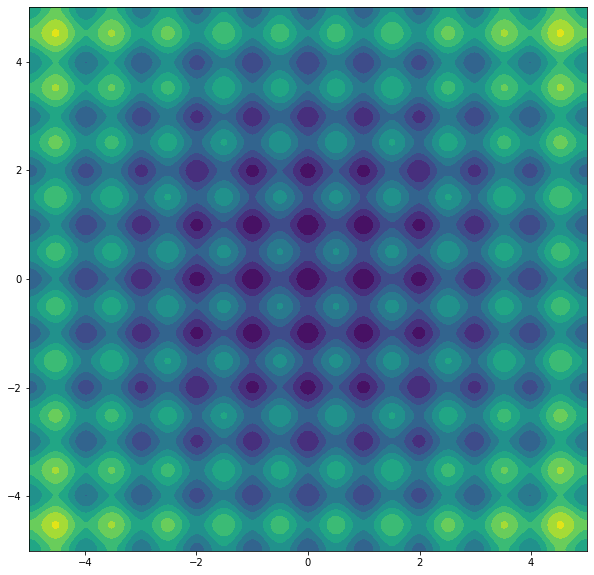

In [394]:
def rastrigin(x, y):
    return 20 + (x**2 - 10 * np.cos(2*np.pi*x)) + (y**2 - 10 * np.cos(2*np.pi*y))

x = np.linspace(-5, 5, num=500)
y = np.linspace(-5, 5, num=500)

X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 10))
plt.contourf(X, Y, rastrigin(X, Y), levels=10)
plt.show()